In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../static/dataset/merged_data.csv')

In [3]:
df.head()

,Unnamed: 0,resume,category
0,0,\nContact\nwww.linkedin.com/in/mansoor-\nah...,Accountant
1,1,\nContact\nwww.linkedin.com/in/syed-\nali-a...,Accountant
2,2,\nContact\nwww.linkedin.com/in/babar-\nkhan...,Accountant
3,3,\nContact\nwww.linkedin.com/in/asra-\nhamid...,Accountant
4,4,\nContact\nwww.linkedin.com/in/umair-azam-\...,Accountant


In [4]:
df.shape

(498, 3)

# Exploring Categories

In [5]:
df['category'].value_counts()

category
Human Resource               100
Accountant                    92
Administration                89
Machine Learning Engineer     82
Data Scientist                79
Data Engineer                 56
Name: count, dtype: int64

In [6]:
# plt.figure(figsize=(15,5))
# sns.countplot(df['category'])
# plt.xticks(rotation=90)
# plt.show()

In [7]:
df['category'].unique()

array(['Accountant', 'Administration', 'Data Engineer', 'Data Scientist',
       'Human Resource', 'Machine Learning Engineer'], dtype=object)

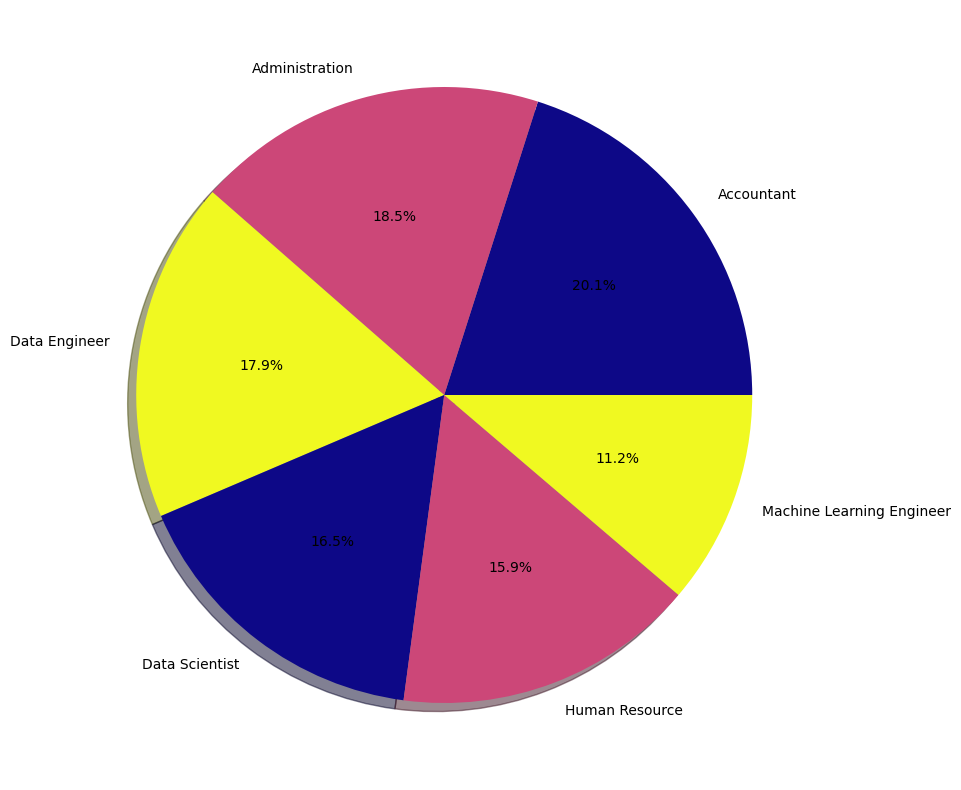

In [8]:
counts = df['category'].value_counts()
labels = df['category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [9]:
df['category'][0]

'Accountant'

In [10]:
df['resume'][0]

'\xa0 \xa0\nContact\nwww.linkedin.com/in/mansoor-\nahmad123  (LinkedIn)\nTop Skills\nMonthly Sales tax submission\nBigCommerce\ndeposcoMansoor Ahmad - ACMA,\nAPFA\nAccountant\nLahore, Punjab, Pakistan\nSummary\nExperienced Finance/Accounts Payable Executive skilled in Finance/\nTreasury and accounts functions. Qualified professional from\nInstitute of Cost and Management Accountants of Pakistan (ICMA\nPakistan).\nExperience\nAHU Technologies Inc\nAccountant\nMay 2023\xa0-\xa0September 2023\xa0 (5 months)\nLahore, Punjab, Pakistan\nVision Village\nAccountant\nNovember 2022\xa0-\xa0May 2023\xa0 (7 months)\nLahore\nRupali Polyester Limited\nAssistant Treasury Manager\nApril 2022\xa0-\xa0November 2022\xa0 (8 months)\nLahore, Punjab, Pakistan\nService Industries Limited\nFinance Officer\nAugust 2020\xa0-\xa0March 2022\xa0 (1 year 8 months)\nLahore District, Punjab, Pakistan\nService Industries Limited\nIntern\nOctober 2019\xa0-\xa0March 2020\xa0 (6 months)\nGulberg 2, Lahore, Pakistan\nAcco

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [11]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [13]:
df['resume'] = df['resume'].apply(lambda x: cleanResume(x))

In [14]:
df['resume'][0]

' Contact www linkedin com in mansoor ahmad123 LinkedIn Top Skills Monthly Sales tax submission BigCommerce deposcoMansoor Ahmad ACMA APFA A ountant Lahore Punjab Pakistan Summary Experienced Finance A ounts Payable Executive skilled in Finance Treasury and a ounts functions Qualified professional from Institute of Cost and Management A ountants of Pakistan ICMA Pakistan Experience AHU Technologies Inc A ountant May 2023 September 2023 5 months Lahore Punjab Pakistan Vision Village A ountant November 2022 May 2023 7 months Lahore Rupali Polyester Limited Assistant Treasury Manager April 2022 November 2022 8 months Lahore Punjab Pakistan Service Industries Limited Finance Officer August 2020 March 2022 1 year 8 months Lahore District Punjab Pakistan Service Industries Limited Intern October 2019 March 2020 6 months Gulberg 2 Lahore Pakistan A ounts Payable Intern Page 1 of 2 Education Institute of Cost and Management A ountants of Pakistan ICMA Pakistan A ounting and Business Management

# words into categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['category'])
df['category'] = le.transform(df['category'])

In [17]:
df.category.unique()

array([0, 1, 2, 3, 4, 5])

In [18]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vactorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['resume'])
requredTaxt  = tfidf.transform(df['resume'])

# Splitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(398, 10759)

In [23]:
X_test.shape

(100, 10759)

# Now let’s train the model and print the classification report:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.77


In [25]:
ypred

array([5, 0, 2, 1, 3, 5, 0, 0, 4, 0, 4, 3, 4, 3, 1, 1, 5, 0, 0, 5, 3, 2,
       5, 1, 0, 1, 4, 5, 0, 0, 5, 1, 1, 0, 4, 1, 3, 3, 5, 3, 2, 2, 0, 4,
       0, 0, 1, 1, 0, 4, 5, 5, 5, 1, 0, 4, 4, 5, 4, 2, 4, 0, 5, 2, 2, 4,
       4, 0, 5, 3, 5, 1, 0, 0, 5, 2, 3, 0, 0, 5, 4, 5, 4, 2, 2, 1, 4, 5,
       1, 5, 5, 0, 1, 5, 0, 3, 4, 0, 0, 4])

# Prediction System

In [26]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [27]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [29]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Python Developer",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Administration",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Machine Learning Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Blockchain
3


In [30]:
import PyPDF2

In [31]:
def pdfextract(pdf_file):
    fileReader = PyPDF2.PdfReader(open(pdf_file,'rb'))
    countpage = len(fileReader.pages)
    count = 0
    txt = []
    while count < countpage:
        pageObj = fileReader.pages[count]
        count +=1
        t = pageObj.extract_text()
        txt.append(t)
    return txt

pdf_file = './Aasma_Aas_Muhammad___DataScience.pdf'
pdfextract(pdf_file)

pdf_text = pdfextract(pdf_file)
pdf_text = " ".join(pdf_text)

# def cleanResume(txt):
#     cleanText = re.sub('http\S+\s', ' ', txt)
#     cleanText = re.sub('RT|cc', ' ', cleanText)
#     cleanText = re.sub('#\S+\s', ' ', cleanText)
#     cleanText = re.sub('@\S+', '  ', cleanText)  
#     cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
#     cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
#     cleanText = re.sub('\s+', ' ', cleanText)
#     return cleanText

# # Clean the input resume
# cleaned_resume = cleanResume(pdf_text)
# print('cleaned_resume=========', cleaned_resume)


In [32]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(pdf_text)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Civil Engineer
5


In [ ]:
import streamlit as st
import pickle
import re
import nltk
import PyPDF2

nltk.download('punkt')
nltk.download('stopwords')
import pickle, re, os
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
#loading models
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

def parse_resume(text_pdf):
    def clean_resume(resume_text):
        clean_text = re.sub('http\S+\s*', ' ', resume_text)
        clean_text = re.sub('RT|cc', ' ', clean_text)
        clean_text = re.sub('#\S+', '', clean_text)
        clean_text = re.sub('@\S+', '  ', clean_text)
        clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
        clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
        clean_text = re.sub('\s+', ' ', clean_text)
        return clean_text
    
    cleaned_resume = clean_resume(text_pdf)
    input_features = tfidfd.transform([cleaned_resume])
    prediction_id = clf.predict(input_features)[0]
    category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }
    category_name = category_mapping.get(prediction_id, "Unknown")
    return category_name